# F1-Score: The Balance Between Precision and Recall

---

## 1. The Idea
- **Precision:** How many of the predicted positives were correct?
- **Recall:** How many of the actual positives did I find?

Sometimes, you want both to be good at the same time.

👉 **F1-score** is a single number that combines both. It’s the *harmonic mean* of precision and recall.

---

## 2. The Formula
$$
F_1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Why harmonic mean (instead of normal average)?**
- Because it punishes imbalanced values.
- Example: Precision = 1.0, Recall = 0.0 → F1 = 0 (not 0.5).
- This makes sense: if recall is zero, the model is useless.

---

## 3. Step-by-Step Example
Suppose:
- Precision = 0.8 (80%)
- Recall = 0.6 (60%)

$$
F_1 = \frac{2 \cdot 0.8 \cdot 0.6}{0.8 + 0.6} = \frac{0.96}{1.4} \approx 0.686
$$

So F1 ≈ 0.69 (a balance between the two).

---

## 4. When to Use F1?
- When false positives and false negatives both matter.
- Especially good for imbalanced datasets (like fraud detection, medical tests).


In [4]:
# Example: Calculating F1-Score in Python

precision = 0.8
recall = 0.6

# Manual calculation
f1_manual = 2 * precision * recall / (precision + recall)
print(f"F1-score (manual): {f1_manual:.2f}")

# With actual predictions
from sklearn.metrics import f1_score

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

print(f"F1-score (sklearn): {f1_score(y_true, y_pred):.2f}")

F1-score (manual): 0.69
F1-score (sklearn): 0.80


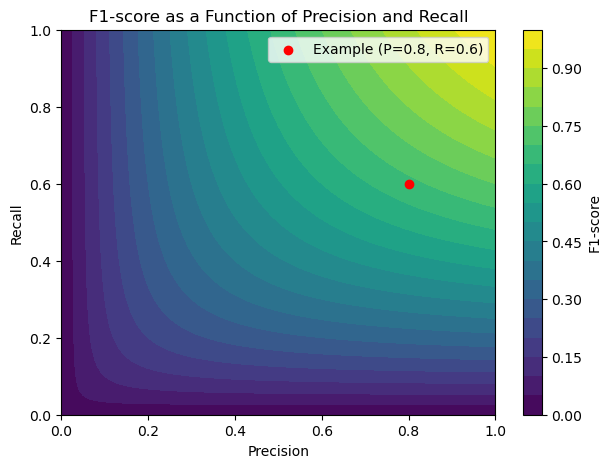

In [5]:
# Visualization: Precision, Recall, and F1-Score Relationship
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of precision and recall values
precision = np.linspace(0, 1, 100)
recall = np.linspace(0, 1, 100)
P, R = np.meshgrid(precision, recall)
F1 = 2 * P * R / (P + R + 1e-8)  # add small value to avoid division by zero

plt.figure(figsize=(7, 5))
cp = plt.contourf(P, R, F1, levels=20, cmap='viridis')
plt.colorbar(cp, label='F1-score')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('F1-score as a Function of Precision and Recall')
plt.scatter([0.8], [0.6], color='red', label='Example (P=0.8, R=0.6)')
plt.legend()
plt.show()
